# Assignment Objectives

In [ ]:
#Using Randomely selected (min) 500 unique cities based on
#Latitude and Longitude
#Perform a weather check on each city using successive API Calls
#Include a print log of each city as it's being processed
#With City Number, City Name, Requested URL
#Save Both a CSV of all data retrieved and png images
#For each scatter plot
#Use Matplotlib and Seaborn Libraries
#Include 3 observable trends
#Proper plot labels (Plot Titles with Analysis dates)
#Axes lables
#Exported markdown README.md
#Build a series of scatter plots
#Temp(F) v. Latitude
#Humidity (%) v. Latitude
#Cloudiness (%) v. Latitude
#Wind Speed (mph) v. Latitude

# Observable Trends

### 1. 
### 2. 
### 3. 

In [1]:
#Dependencies
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from setuptools import setup, find_packages
import openweathermapy.core as owm
from pprint import pprint
from citipy import citipy
#config
from config import api_key

In [2]:
api_key = "a9d9051f41b69e6ee57e6f70a307fd61"
url = "http://api.openweathermap.org/data/2.5/weather?appid=a9d9051f41b69e6ee57e6f70a307fd61"
print(url)

http://api.openweathermap.org/data/2.5/weather?appid=a9d9051f41b69e6ee57e6f70a307fd61


# Create a List for Coordinates and Cities

In [3]:
# Create an open list for coordinates and cities
lat_lng = []
cities = []

#Random Data Points
lat = np.random.uniform(low=-90, high=90, size=2000)
lng = np.random.uniform(low=-180, high=180, size=2000)
# lat_lng = zip(lat,lng)
# data = owm.find_cities_by_geo_coord(lat_lng, 2000)
# #Identify nearist city for each lat,lng combo
# city = citipy.nearest_city(lat[0],lng[0]).city_name
# #If city is unique, add to city list
# if city not in cities:
#     cities.append(city)
# lat = np.random.rand(500)*np.random.choice([90,-90])
# lng = np.random.rand(500)*np.random.choice([180,-180])
# coord = zip(lat, lng)
# location = coord
# data = owm.find_cities_by_geo_coord(location, 500)
# # def main():
for i in range(0, len(lat)):
    lat_lng.append((lat[i], lng[i]))
    
for coordinate_pair in lat_lng:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# owm.BASE_URL

#Create a base DataFrame of Cities
cities_DF = pd.DataFrame(cities)
cities_DF["City Name"]= ""
cities_DF["Country Code"] = ""
cities_DF.head()

,0,City Name,Country Code
0,<citipy.citipy.City object at 0x00000199307D2FD0>,,
1,<citipy.citipy.City object at 0x00000199307D5780>,,
2,<citipy.citipy.City object at 0x0000019930733588>,,
3,<citipy.citipy.City object at 0x000001992FBC3A90>,,
4,<citipy.citipy.City object at 0x000001992FE896D8>,,


In [4]:
#Find City Name and Country Code using Pandas iLoc
for index, row in cities_DF.iterrows():
    row["City Name"] = cities_DF.iloc[index,0].city_name
    row["Country Code"] = cities_DF.iloc[index,0].country_code
print(cities_DF)
#Use only uniques, eliminate duplicates
cities_DF.drop_duplicates(["City Name", "Country Code"], inplace=True)
cities_DF.reset_index(inplace=True)

#Delete unused columns
del cities_DF[0]
del cities_DF["index"]

cities_DF.head()

                                                      0      City Name  \
0     <citipy.citipy.City object at 0x00000199307D2FD0>         barrow   
1     <citipy.citipy.City object at 0x00000199307D5780>           nome   
2     <citipy.citipy.City object at 0x0000019930733588>      micheweni   
3     <citipy.citipy.City object at 0x000001992FBC3A90>   myrtle beach   
4     <citipy.citipy.City object at 0x000001992FE896D8>     kaitangata   
5     <citipy.citipy.City object at 0x0000019930BCD080>       hermanus   
6     <citipy.citipy.City object at 0x000001992EE2B390>   rio gallegos   
7     <citipy.citipy.City object at 0x000001992F05BD30>     vila velha   
8     <citipy.citipy.City object at 0x00000199305E64A8>       ust-nera   
9     <citipy.citipy.City object at 0x000001992EE61128>      katherine   
10    <citipy.citipy.City object at 0x0000019930BC6390>      cape town   
11    <citipy.citipy.City object at 0x000001992EE305F8>        ushuaia   
12    <citipy.citipy.City object at 0x

,City Name,Country Code
0,barrow,us
1,nome,us
2,micheweni,tz
3,myrtle beach,us
4,kaitangata,nz


In [ ]:
print(lat_lng[0])
print(cities[0])

In [17]:
#Create a Dataframe displaying Coordinates
coordinates_df = pd.DataFrame({"Lat": lat,
                              "Lon": lng})
coordinates_df.head()

,Lat,Lon
0,12.372632,-157.585887
1,12.372632,-166.694391
2,12.372632,41.904505
3,12.372632,-78.762433
4,12.372632,177.568509


In [18]:
#Create a Dataframe including:
#Temp(F)
#Humidity (%)
#Cloudiness (%)
#Wind Speed (mph)
coord_df = coordinates_df
coord_df["City Name"] = ""
coord_df["Country"] = ""
coord_df["Temperature (F)"] = ""
coord_df["Humidity(%)"]= ""
coord_df["Cloudiness(%)"] = ""
coord_df["Wind Speed (MPH)"] = ""
coord_df.head()

,Lat,Lon,City Name,Country,Temperature (F),Humidity(%),Cloudiness(%),Wind Speed (MPH)
0,12.372632,-157.585887,,,,,,
1,12.372632,-166.694391,,,,,,
2,12.372632,41.904505,,,,,,
3,12.372632,-78.762433,,,,,,
4,12.372632,177.568509,,,,,,


In [19]:
#Append cities_DF to include coord_df
cities_DF["Latitude"] = ""
cities_DF["Longitude"] = ""
cities_DF["Temperature (F)"] = ""
cities_DF["Humidity (%)"] = ""
cities_DF["Cloudiness (%)"] = ""
cities_DF["Wind Speed (MPH)"] = ""
cities_DF.head()

,City Name,Country Code,Latitutde,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Latitude
0,barrow,us,,,,,,,
1,nome,us,,,,,,,
2,micheweni,tz,,,,,,,
3,myrtle beach,us,,,,,,,
4,kaitangata,nz,,,,,,,


In [ ]:
#Create a dictionary of information needed/intested in
units = "imperial"
settings = {"units": "imperial", "appid": api_key}
#Open Necessary Files
# + "&q=" + city
url = "http://api.openweathermap.org/data/2.5/weather?"
# city = 
api_key = "a9d9051f41b69e6ee57e6f70a307fd61"
# Build query URL
query_url = f"{url}appid={api_key}&units={units}"
# query_url = url + "appid=" + api_key + "&q="
# + city
print(query_url)

In [ ]:
api_key

In [ ]:
# #Get Weather Data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()

# print(json.dumps(weather_json, sort_keys=True, indent=4))
# #Pretty Print File
# # pprint(weather_json)
# print(url)

In [ ]:
# #try geting current weather
# current_weather = owm.get_current("Paris",**settings)
# # pprint(f"{current_weather}")
# pprint(current_weather)

# Data Retrieval

In [27]:
#Building cities_DF Dataframe
print("Begin Data Retrieval")
print("--------------------------")

for index, row in cities_DF.iterrows():
    #Test print row and two series of row
    print(index, row, row["City Name"], row["Country Code"])
#     print("Processing Record " + str(index) + " of Set 1 |")
    print("Processing Record " + str(index) + " of Set 1 |" + str(row["City Name"]))
    
    url = "http://api.openweathermap.org/data/2.5/weather?appid=%s&q=%s&units=imperial" % (api_key, row["City Name"])
#     print(url)
    #Convert to json
    weather_data = requests.get(url)
    print(weather_data.url)
    weather_data = weather_data.json()
    
    #Use Exception Handling to override non-existing data in a city
    try:
        lats = weather_data["coord"]["lat"]
        lngs = weather_data["coord"]["long"]
        temps = weather_data["main"]["temp"]
        humid = weather_data["main"]["humidity"]
        clouds = weather_data["clouds"]["all"]
        winds = weather_data["wind"]["speed"]
        
#         #Reset Values by index, "String Heading", city measurements
#         cities_DF.set_value(index,"Latitude", lats, takeable=True)
#         cities_DF.set_value(index,"Longitude", lngs, takeable=True)
#         cities_DF.set_value(index,"Temperature (F)", temps, takeable=True)
#         cities_DF.set_value(index,"Humidity (%)", humid, takeable=True)
#         cities_DF.set_value(index,"Cloudiness (%)", clouds, takeable=True)
#         cities_DF.set_value(index,"Wind Speed (MPH)", winds, takeable=True)

        #Append city_DF
        cities_DF.append({"Latitude": lats,
                         "Longitude": lngs,
                         "Temperature (F)": temps,
                         "Humidity (%)": humid,
                         "Cloudiness (%)": clouds,
                         "Wind Speed (MPH)": winds})

    except:
        print("Override Duplicate Data")
        continue
print("--------------------------")
print("End Data Retrieval")

Begin Data Retrieval
--------------------------
0 City Name           barrow
Country Code            us
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 0, dtype: object barrow us
Processing Record 0 of Set 1 |barrow
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=barrow&units=imperial
Override Duplicate Data
1 City Name           nome
Country Code          us
Latitutde               
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (MPH)        
Latitude                
Name: 1, dtype: object nome us
Processing Record 1 of Set 1 |nome
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nome&units=imperial
Override Duplicate Data
2 City Name           micheweni
Country Code               tz
Latitutde       

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kununurra&units=imperial
Override Duplicate Data
18 City Name           kutum
Country Code           sd
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 18, dtype: object kutum sd
Processing Record 18 of Set 1 |kutum
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kutum&units=imperial
Override Duplicate Data
19 City Name           mergui
Country Code            mm
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 19, dtype: object mergui mm
Processing Record 19 of Set 1 |mergui
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mergui&units=impe

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tuatapere&units=imperial
Override Duplicate Data
36 City Name           hilo
Country Code          us
Latitutde               
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (MPH)        
Latitude                
Name: 36, dtype: object hilo us
Processing Record 36 of Set 1 |hilo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hilo&units=imperial
Override Duplicate Data
37 City Name           busselton
Country Code               au
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 37, dtype: object busselton au
Processing Record 37 of Set 1 |busselton
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d50

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=khatanga&units=imperial
Override Duplicate Data
53 City Name           conde
Country Code           br
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 53, dtype: object conde br
Processing Record 53 of Set 1 |conde
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=conde&units=imperial
Override Duplicate Data
54 City Name           soure
Country Code           br
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 54, dtype: object soure br
Processing Record 54 of Set 1 |soure
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=soure&units=imperial
Override

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tura&units=imperial
Override Duplicate Data
72 City Name           lakes entrance
Country Code                    au
Latitutde                         
Longitude                         
Temperature (F)                   
Humidity (%)                      
Cloudiness (%)                    
Wind Speed (MPH)                  
Latitude                          
Name: 72, dtype: object lakes entrance au
Processing Record 72 of Set 1 |lakes entrance
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lakes%20entrance&units=imperial
Override Duplicate Data
73 City Name           port alfred
Country Code                 za
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 73, dtype: object por

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bathsheba&units=imperial
Override Duplicate Data
90 City Name           sumenep
Country Code             id
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 90, dtype: object sumenep id
Processing Record 90 of Set 1 |sumenep
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sumenep&units=imperial
Override Duplicate Data
91 City Name           fortuna
Country Code             us
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 91, dtype: object fortuna us
Processing Record 91 of Set 1 |fortuna
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba6156

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hithadhoo&units=imperial
Override Duplicate Data
107 City Name           gushikawa
Country Code               jp
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 107, dtype: object gushikawa jp
Processing Record 107 of Set 1 |gushikawa
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=gushikawa&units=imperial
Override Duplicate Data
108 City Name           oshakati
Country Code              na
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 108, dtype: object oshakati na
Processing Record 108 of Set 1 |oshakati
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=port%20hardy&units=imperial
Override Duplicate Data
124 City Name           boende
Country Code            cd
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 124, dtype: object boende cd
Processing Record 124 of Set 1 |boende
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=boende&units=imperial
Override Duplicate Data
125 City Name           attawapiskat
Country Code                  ca
Latitutde                       
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (MPH)                
Latitude                        
Name: 125, dtype: object attawapiskat ca
Processing Record 125 of Set 1 |attawapiskat
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mahebourg&units=imperial
Override Duplicate Data
142 City Name           westport
Country Code              nz
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 142, dtype: object westport nz
Processing Record 142 of Set 1 |westport
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=westport&units=imperial
Override Duplicate Data
143 City Name           pringsewu
Country Code               id
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 143, dtype: object pringsewu id
Processing Record 143 of Set 1 |pringsewu
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=sentyabrskiy&units=imperial
Override Duplicate Data
160 City Name           muzhi
Country Code           ru
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 160, dtype: object muzhi ru
Processing Record 160 of Set 1 |muzhi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=muzhi&units=imperial
Override Duplicate Data
161 City Name           babanka
Country Code             ua
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 161, dtype: object babanka ua
Processing Record 161 of Set 1 |babanka
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=provideniya&units=imperial
Override Duplicate Data
178 City Name           boca do acre
Country Code                  br
Latitutde                       
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (MPH)                
Latitude                        
Name: 178, dtype: object boca do acre br
Processing Record 178 of Set 1 |boca do acre
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=boca%20do%20acre&units=imperial
Override Duplicate Data
179 City Name           chiriqui grande
Country Code                     pa
Latitutde                          
Longitude                          
Temperature (F)                    
Humidity (%)                       
Cloudiness (%)                     
Wind Speed (MPH)                   
Latitude                           
Na

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=belushya%20guba&units=imperial
Override Duplicate Data
196 City Name           georgetown
Country Code                sh
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 196, dtype: object georgetown sh
Processing Record 196 of Set 1 |georgetown
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=georgetown&units=imperial
Override Duplicate Data
197 City Name           saldanha
Country Code              za
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 197, dtype: object saldanha za
Processing Record 197 of Set 1 |saldanha
http://api.

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=snyder&units=imperial
Override Duplicate Data
213 City Name           grand-santi
Country Code                 gf
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 213, dtype: object grand-santi gf
Processing Record 213 of Set 1 |grand-santi
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=grand-santi&units=imperial
Override Duplicate Data
214 City Name           nizhneyansk
Country Code                 ru
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 214, dtype: object nizhneyansk ru
Processing Record 2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mount%20gambier&units=imperial
Override Duplicate Data
231 City Name           okhotsk
Country Code             ru
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 231, dtype: object okhotsk ru
Processing Record 231 of Set 1 |okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=okhotsk&units=imperial
Override Duplicate Data
232 City Name           clyde river
Country Code                 ca
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 232, dtype: object clyde river ca
Processing Record 232 of Set 1 |clyde river
http://api.ope

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=saleaula&units=imperial
Override Duplicate Data
248 City Name           naze
Country Code          jp
Latitutde               
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (MPH)        
Latitude                
Name: 248, dtype: object naze jp
Processing Record 248 of Set 1 |naze
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=naze&units=imperial
Override Duplicate Data
249 City Name           muroto
Country Code            jp
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 249, dtype: object muroto jp
Processing Record 249 of Set 1 |muroto
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=muroto&units=imperial
Ov

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=san%20patricio&units=imperial
Override Duplicate Data
266 City Name           naron
Country Code           es
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 266, dtype: object naron es
Processing Record 266 of Set 1 |naron
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=naron&units=imperial
Override Duplicate Data
267 City Name           yulara
Country Code            au
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 267, dtype: object yulara au
Processing Record 267 of Set 1 |yulara
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=yulara

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bismarck&units=imperial
Override Duplicate Data
285 City Name           buala
Country Code           sb
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 285, dtype: object buala sb
Processing Record 285 of Set 1 |buala
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=buala&units=imperial
Override Duplicate Data
286 City Name           statesboro
Country Code                us
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 286, dtype: object statesboro us
Processing Record 286 of Set 1 |statesboro
http://api.openweathermap.org/data/2.5/weather?appid=224

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=saint%20george&units=imperial
Override Duplicate Data
303 City Name           salto
Country Code           uy
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 303, dtype: object salto uy
Processing Record 303 of Set 1 |salto
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=salto&units=imperial
Override Duplicate Data
304 City Name           kirando
Country Code             tz
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 304, dtype: object kirando tz
Processing Record 304 of Set 1 |kirando
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d5

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lujan&units=imperial
Override Duplicate Data
321 City Name           apatou
Country Code            gf
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 321, dtype: object apatou gf
Processing Record 321 of Set 1 |apatou
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=apatou&units=imperial
Override Duplicate Data
322 City Name           oytal
Country Code           kz
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 322, dtype: object oytal kz
Processing Record 322 of Set 1 |oytal
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=oytal&units=im

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=spearfish&units=imperial
Override Duplicate Data
339 City Name           talara
Country Code            pe
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 339, dtype: object talara pe
Processing Record 339 of Set 1 |talara
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=talara&units=imperial
Override Duplicate Data
340 City Name           san juan bautista
Country Code                       pe
Latitutde                            
Longitude                            
Temperature (F)                      
Humidity (%)                         
Cloudiness (%)                       
Wind Speed (MPH)                     
Latitude                             
Name: 340, dtype: object san juan bautista pe
Processing Recor

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=dole&units=imperial
Override Duplicate Data
357 City Name           lincoln
Country Code             nz
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 357, dtype: object lincoln nz
Processing Record 357 of Set 1 |lincoln
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lincoln&units=imperial
Override Duplicate Data
358 City Name           hays
Country Code          us
Latitutde               
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (MPH)        
Latitude                
Name: 358, dtype: object hays us
Processing Record 358 of Set 1 |hays
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=hays&units=imp

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=falealupo&units=imperial
Override Duplicate Data
375 City Name           katsuura
Country Code              jp
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 375, dtype: object katsuura jp
Processing Record 375 of Set 1 |katsuura
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=katsuura&units=imperial
Override Duplicate Data
376 City Name           half moon bay
Country Code                   us
Latitutde                        
Longitude                        
Temperature (F)                  
Humidity (%)                     
Cloudiness (%)                   
Wind Speed (MPH)                 
Latitude                         
Name: 376, dtype: object half moon bay us
Processing Record 376 of Set 1 |

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tupik&units=imperial
Override Duplicate Data
392 City Name           namibe
Country Code            ao
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 392, dtype: object namibe ao
Processing Record 392 of Set 1 |namibe
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=namibe&units=imperial
Override Duplicate Data
393 City Name           kremenchuk
Country Code                ua
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 393, dtype: object kremenchuk ua
Processing Record 393 of Set 1 |kremenchuk
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=temir&units=imperial
Override Duplicate Data
410 City Name           barmer
Country Code            in
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 410, dtype: object barmer in
Processing Record 410 of Set 1 |barmer
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=barmer&units=imperial
Override Duplicate Data
411 City Name           deputatskiy
Country Code                 ru
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 411, dtype: object deputatskiy ru
Processing Record 411 of Set 1 |deputatskiy
http://api.openweathermap.org/data/2

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ngukurr&units=imperial
Override Duplicate Data
428 City Name           pershotravneve
Country Code                    ua
Latitutde                         
Longitude                         
Temperature (F)                   
Humidity (%)                      
Cloudiness (%)                    
Wind Speed (MPH)                  
Latitude                          
Name: 428, dtype: object pershotravneve ua
Processing Record 428 of Set 1 |pershotravneve
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pershotravneve&units=imperial
Override Duplicate Data
429 City Name           sharjah
Country Code             ae
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 429, dtype: object sharjah ae
Processing Record 429 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=bubaque&units=imperial
Override Duplicate Data
446 City Name           road town
Country Code               vg
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 446, dtype: object road town vg
Processing Record 446 of Set 1 |road town
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=road%20town&units=imperial
Override Duplicate Data
447 City Name           axim
Country Code          gh
Latitutde               
Longitude               
Temperature (F)         
Humidity (%)            
Cloudiness (%)          
Wind Speed (MPH)        
Latitude                
Name: 447, dtype: object axim gh
Processing Record 447 of Set 1 |axim
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=marzuq&units=imperial
Override Duplicate Data
464 City Name           columbus
Country Code              us
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 464, dtype: object columbus us
Processing Record 464 of Set 1 |columbus
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=columbus&units=imperial
Override Duplicate Data
465 City Name           valdivia
Country Code              cl
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 465, dtype: object valdivia cl
Processing Record 465 of Set 1 |valdivia
http://api.openweathermap.org/data/2.5/weath

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tual&units=imperial
Override Duplicate Data
482 City Name           palaikastron
Country Code                  gr
Latitutde                       
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (MPH)                
Latitude                        
Name: 482, dtype: object palaikastron gr
Processing Record 482 of Set 1 |palaikastron
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=palaikastron&units=imperial
Override Duplicate Data
483 City Name           baoro
Country Code           cf
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 483, dtype: object baoro cf
Processing Record 483 of Set 1 |baoro
http://api.openweathermap.org/d

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=nouadhibou&units=imperial
Override Duplicate Data
501 City Name           urambo
Country Code            tz
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 501, dtype: object urambo tz
Processing Record 501 of Set 1 |urambo
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=urambo&units=imperial
Override Duplicate Data
502 City Name           wad rawah
Country Code               sd
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 502, dtype: object wad rawah sd
Processing Record 502 of Set 1 |wad rawah
http://api.openweathermap.org/data/2.5/weather?appid=

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=praya&units=imperial
Override Duplicate Data
518 City Name           kosh-agach
Country Code                ru
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 518, dtype: object kosh-agach ru
Processing Record 518 of Set 1 |kosh-agach
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=kosh-agach&units=imperial
Override Duplicate Data
519 City Name           vila franca do campo
Country Code                          pt
Latitutde                               
Longitude                               
Temperature (F)                         
Humidity (%)                            
Cloudiness (%)                          
Wind Speed (MPH)                        
Latitude                        

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=manono&units=imperial
Override Duplicate Data
535 City Name           assiniboia
Country Code                ca
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 535, dtype: object assiniboia ca
Processing Record 535 of Set 1 |assiniboia
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=assiniboia&units=imperial
Override Duplicate Data
536 City Name           la macarena
Country Code                 co
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 536, dtype: object la macarena co
Processing Record 536 of Set 1 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=inhambane&units=imperial
Override Duplicate Data
554 City Name           tigil
Country Code           ru
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 554, dtype: object tigil ru
Processing Record 554 of Set 1 |tigil
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=tigil&units=imperial
Override Duplicate Data
555 City Name           vyartsilya
Country Code                ru
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 555, dtype: object vyartsilya ru
Processing Record 555 of Set 1 |vyartsilya
http://api.openweathermap.org/data/2.5/weather?appid=22

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=atikokan&units=imperial
Override Duplicate Data
572 City Name           igarka
Country Code            ru
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 572, dtype: object igarka ru
Processing Record 572 of Set 1 |igarka
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=igarka&units=imperial
Override Duplicate Data
573 City Name           sorland
Country Code             no
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 573, dtype: object sorland no
Processing Record 573 of Set 1 |sorland
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=mitsamiouli&units=imperial
Override Duplicate Data
590 City Name           da nang
Country Code             vn
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 590, dtype: object da nang vn
Processing Record 590 of Set 1 |da nang
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=da%20nang&units=imperial
Override Duplicate Data
591 City Name           skibbereen
Country Code                ie
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 591, dtype: object skibbereen ie
Processing Record 591 of Set 1 |skibbereen
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ulladulla&units=imperial
Override Duplicate Data
608 City Name           karagaylinskiy
Country Code                    ru
Latitutde                         
Longitude                         
Temperature (F)                   
Humidity (%)                      
Cloudiness (%)                    
Wind Speed (MPH)                  
Latitude                          
Name: 608, dtype: object karagaylinskiy ru
Processing Record 608 of Set 1 |karagaylinskiy
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=karagaylinskiy&units=imperial
Override Duplicate Data
609 City Name           polunochnoye
Country Code                  ru
Latitutde                       
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (MPH)                
Latitude                        
Name: 609, 

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=lima&units=imperial
Override Duplicate Data
626 City Name           ulaangom
Country Code              mn
Latitutde                   
Longitude                   
Temperature (F)             
Humidity (%)                
Cloudiness (%)              
Wind Speed (MPH)            
Latitude                    
Name: 626, dtype: object ulaangom mn
Processing Record 626 of Set 1 |ulaangom
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ulaangom&units=imperial
Override Duplicate Data
627 City Name           rawson
Country Code            ar
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 627, dtype: object rawson ar
Processing Record 627 of Set 1 |rawson
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=pilar&units=imperial
Override Duplicate Data
645 City Name           komsomolskiy
Country Code                  ru
Latitutde                       
Longitude                       
Temperature (F)                 
Humidity (%)                    
Cloudiness (%)                  
Wind Speed (MPH)                
Latitude                        
Name: 645, dtype: object komsomolskiy ru
Processing Record 645 of Set 1 |komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=komsomolskiy&units=imperial
Override Duplicate Data
646 City Name           tanout
Country Code            ne
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 646, dtype: object tanout ne
Processing Record 646 of Set 1 |tanout
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=orillia&units=imperial
Override Duplicate Data
664 City Name           patacamaya
Country Code                bo
Latitutde                     
Longitude                     
Temperature (F)               
Humidity (%)                  
Cloudiness (%)                
Wind Speed (MPH)              
Latitude                      
Name: 664, dtype: object patacamaya bo
Processing Record 664 of Set 1 |patacamaya
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=patacamaya&units=imperial
Override Duplicate Data
665 City Name           fort nelson
Country Code                 ca
Latitutde                      
Longitude                      
Temperature (F)                
Humidity (%)                   
Cloudiness (%)                 
Wind Speed (MPH)               
Latitude                       
Name: 665, dtype: object fort nelson ca
Processing Record 665 of Set 1

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=goderich&units=imperial
Override Duplicate Data
682 City Name           uchaly
Country Code            ru
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 682, dtype: object uchaly ru
Processing Record 682 of Set 1 |uchaly
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=uchaly&units=imperial
Override Duplicate Data
683 City Name           viedma
Country Code            ar
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 683, dtype: object viedma ar
Processing Record 683 of Set 1 |viedma
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=foca&units=imperial
Override Duplicate Data
701 City Name           macau
Country Code           br
Latitutde                
Longitude                
Temperature (F)          
Humidity (%)             
Cloudiness (%)           
Wind Speed (MPH)         
Latitude                 
Name: 701, dtype: object macau br
Processing Record 701 of Set 1 |macau
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=macau&units=imperial
Override Duplicate Data
702 City Name           pokosnoye
Country Code               ru
Latitutde                    
Longitude                    
Temperature (F)              
Humidity (%)                 
Cloudiness (%)               
Wind Speed (MPH)             
Latitude                     
Name: 702, dtype: object pokosnoye ru
Processing Record 702 of Set 1 |pokosnoye
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567

http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=ulaanbaatar&units=imperial
Override Duplicate Data
719 City Name           akdepe
Country Code            tm
Latitutde                 
Longitude                 
Temperature (F)           
Humidity (%)              
Cloudiness (%)            
Wind Speed (MPH)          
Latitude                  
Name: 719, dtype: object akdepe tm
Processing Record 719 of Set 1 |akdepe
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7c77e410d506&q=akdepe&units=imperial
Override Duplicate Data
720 City Name           tautira
Country Code             pf
Latitutde                  
Longitude                  
Temperature (F)            
Humidity (%)               
Cloudiness (%)             
Wind Speed (MPH)           
Latitude                   
Name: 720, dtype: object tautira pf
Processing Record 720 of Set 1 |tautira
http://api.openweathermap.org/data/2.5/weather?appid=224f7b3f56aba61567ec7

In [29]:
#Check for completed DataFrame
cities_DF.head()

,City Name,Country Code,Latitutde,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH),Latitude
0,barrow,us,,,,,,,
1,nome,us,,,,,,,
2,micheweni,tz,,,,,,,
3,myrtle beach,us,,,,,,,
4,kaitangata,nz,,,,,,,


In [ ]:
# pwd
#Export to CSV
cities_DF.to_csv("weatherPy.csv")

# Building Scatter Plots

## 1 Temperature (F) v Latitude

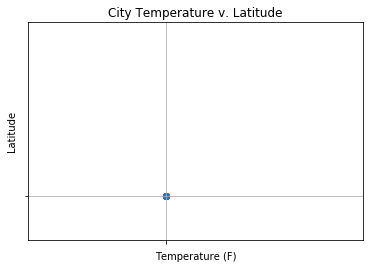

In [13]:
#Build a scatter plot
plt.scatter(cities_DF["Temperature (F)"],
           cities_DF["Latitude"])
#Label Heading
plt.title("City Temperature v. Latitude")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 200)
plt.xlabel("Temperature (F)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("Temperature v. Latitude")
plt.show()

## 2 Humidity (%) v. Latitude

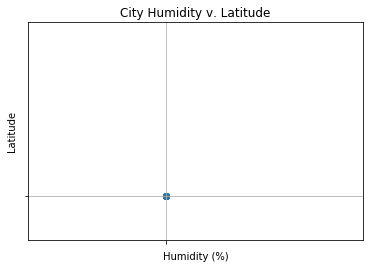

In [23]:
#Build a scatter plot
plt.scatter(cities_DF["Humidity (%)"],
           cities_DF["Latitude"])
#Label Heading
plt.title("City Humidity v. Latitude")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 200)
plt.xlabel("Humidity (%)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("Humidity v. Latitude")
plt.show()

## 3 Cloudiness (%) v. Latitude

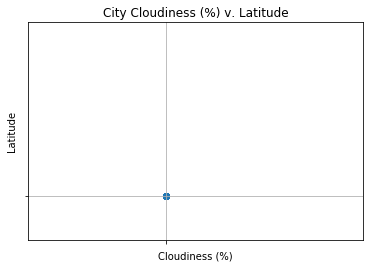

In [24]:
#Build a scatter plot
plt.scatter(cities_DF["Cloudiness (%)"],
           cities_DF["Latitude"])
#Label Heading
plt.title("City Cloudiness (%) v. Latitude")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 200)
plt.xlabel("Cloudiness (%)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("Cloudiness v. Latitude")
plt.show()

## 4 Wind Speed (mph) v. Latitude

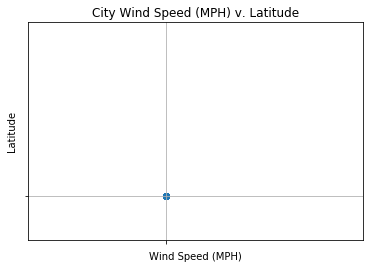

In [25]:
#Build a scatter plot
plt.scatter(cities_DF["Wind Speed (MPH)"],
           cities_DF["Latitude"])
#Label Heading
plt.title("City Wind Speed (MPH) v. Latitude")
#Axes labels and limits
plt.ylabel("Latitude")
plt.ylim(-50, 200)
plt.xlabel("Wind Speed (MPH)")
plt.xlim(-70, 100)
#Show axis grids
plt.grid(True)
#Save Plot
plt.savefig("Wind Speed v. Latitude")
plt.show()